In [2]:
from pathlib import Path
import h5py
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')

from source.helper import to_dB, print_spectogram, gen_spectogram, \
                          diff_frames, generate_kalman_trajectory, cut_trajectory_slices_from_spectrogram, generate_multiple_kalman_trajectories, cut_trajectory_from_spectrogram

In [2]:
BASE_DIR = Path("D:/SIIUM/3 semestr/RADAR/radar-project/data")  # change to your project dir

margin = 500

loaded_file = h5py.File(BASE_DIR / 'complete_dataset.h5', 'r')

sample_file = loaded_file['2023_05_08']['bartek']
sample_file = sample_file[margin:-margin, 0, 0, :]
normal_spect, y = gen_spectogram(sample_file)
normal_spect = to_dB(normal_spect)

frames_diff = diff_frames(sample_file, 1)
diff_spect, y = gen_spectogram(frames_diff)
diff_spectdb = to_dB(diff_spect)

c:\Users\ozale\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ozale\miniconda3\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\ozale\miniconda3\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


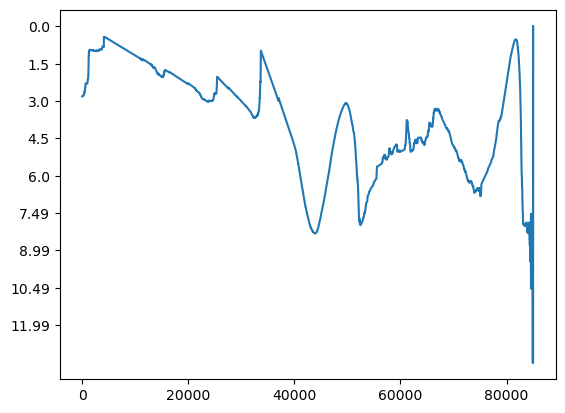

In [3]:
trajectory = generate_kalman_trajectory(diff_spectdb)
plt.plot(trajectory)
plt.yticks(np.arange(start=0, stop=81, step=10), y[:81:10])
plt.gca().invert_yaxis()
plt.show()

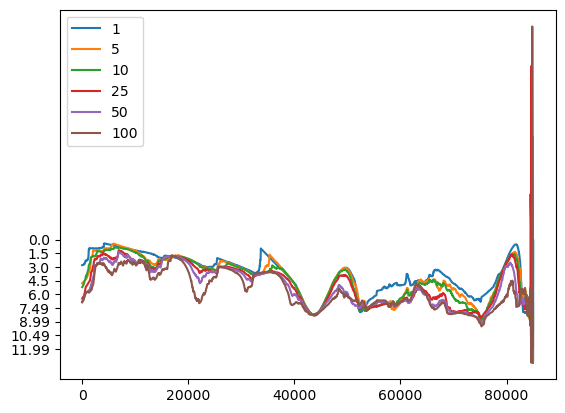

In [4]:
diffs = [1, 5, 10, 25, 50, 100]
trajectories = generate_multiple_kalman_trajectories(sample_file, diffs)

[plt.plot(trajectory, label=diffs[idx]) for idx, trajectory in enumerate(trajectories)]
plt.legend()
plt.yticks(np.arange(start=0, stop=81, step=10), y[:81:10])
plt.gca().invert_yaxis()
plt.show()

In [5]:
cut_trajectory, slices = cut_trajectory_slices_from_spectrogram(normal_spect, trajectories[0], window_height=64)

In [6]:
slices.shape

(2654, 64, 64)

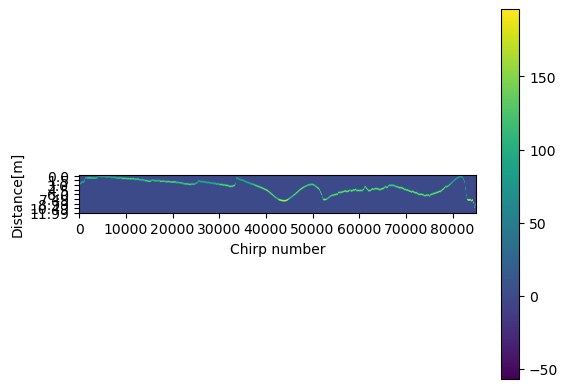

In [7]:
print_spectogram(cut_trajectory, y, depth_limit=12)

In [12]:
from tensorflow.keras.utils import to_categorical
from enum import Enum

class SampleType(Enum):
    BARTEK = 0
    KUBA = 1
    OSKAR = 2
    RAFAL = 3
    FAKE = 4
    NOISE = 5
    AUTO = 6
    WIATRAK = 7

BASE_DIR = Path("D:/SIIUM/3 semestr/RADAR/radar-project/data")  # change to your project dir

margin = 500

loaded_file = h5py.File(BASE_DIR / 'complete_dataset.h5', 'r')


In [13]:
data_keys = list(loaded_file['2023_05_08'].keys())

dict_classes = {
        'background': SampleType.NOISE,
        'bartek': SampleType.BARTEK,
        'kuba': SampleType.KUBA,
        'oddychacz_2m_o0_s100': SampleType.FAKE,
        'oddychacz_2m_o30_s0': SampleType.FAKE,
        'oddychacz_2m_o30_s100': SampleType.FAKE,
        'oddychacz_3m_o0_s100': SampleType.FAKE,
        'oddychacz_3m_o30_s0': SampleType.FAKE,
        'oddychacz_3m_o30_s100': SampleType.FAKE,
        'oddychacz_4m_o0_s100': SampleType.FAKE,
        'oddychacz_4m_o30_s0': SampleType.FAKE,
        'oddychacz_4m_o30_s100': SampleType.FAKE,
        'oskar': SampleType.OSKAR,
        'rafal': SampleType.RAFAL,
        'randomowe_chodzonko_bartek': SampleType.BARTEK,
        'randomowe_chodzonko_kuba': SampleType.KUBA,
        'randomowe_chodzonko_oskar': SampleType.OSKAR,
        'randomowe_chodzonko_rafal': SampleType.RAFAL,
        'samochod': SampleType.AUTO,
        'wiatrak_2m': SampleType.WIATRAK,
        'wiatrak_3m': SampleType.WIATRAK,
        'wiatrak_4m': SampleType.WIATRAK,
        'wiatrak_foliarz_2m': SampleType.WIATRAK,
        'wiatrak_foliarz_3m': SampleType.WIATRAK,
        'wiatrak_foliarz_4m': SampleType.WIATRAK,
}


In [18]:

h5_file = h5py.File(BASE_DIR / 'complete_dataset.h5', 'r')

margin = 500

slices_ds = []
labels_ds = []
for key in data_keys:
    print(key)
    sample_file = h5_file['2023_05_08'][key]
    sample_file = sample_file[margin:-margin, 0, 0, :]
    normal_spect, y = gen_spectogram(sample_file)
    normal_spect = to_dB(normal_spect)

    frames_diff = diff_frames(sample_file, 1)
    diff_spect, y = gen_spectogram(frames_diff)
    diff_spectdb = to_dB(diff_spect)
    trajectory = generate_multiple_kalman_trajectories(sample_file, [1])[0]
    cut_trajectory, slices = cut_trajectory_slices_from_spectrogram(normal_spect, trajectory, window_height=64)
    slices_ds.append(slices)

    class_id = dict_classes[key].value
    labels = np.full(slices.shape[0], class_id)
    labels = to_categorical(labels, num_classes=8)
    labels_ds.append(labels)

slices_ds = np.array(slices_ds)
labels_ds = np.array(labels_ds)
slices_ds = np.concatenate(slices_ds, axis=0)
labels_ds = np.concatenate(labels_ds, axis=0)
print(slices_ds.shape)
print(labels_ds.shape)


background
bartek
kuba
oddychacz_2m_o0_s100
oddychacz_2m_o30_s0
oddychacz_2m_o30_s100
oddychacz_3m_o0_s100
oddychacz_3m_o30_s0
oddychacz_3m_o30_s100
oddychacz_4m_o0_s100
oddychacz_4m_o30_s0
oddychacz_4m_o30_s100
oskar
rafal
randomowe_chodzonko_bartek
randomowe_chodzonko_kuba
randomowe_chodzonko_oskar
randomowe_chodzonko_rafal
samochod
wiatrak_2m
wiatrak_3m
wiatrak_4m
wiatrak_foliarz_2m
wiatrak_foliarz_3m
wiatrak_foliarz_4m


C:\Users\ozale\AppData\Local\Temp\ipykernel_3140\1828965776.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  slices_ds = np.array(slices_ds)
C:\Users\ozale\AppData\Local\Temp\ipykernel_3140\1828965776.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels_ds = np.array(labels_ds)


(26232, 64, 64)
(26232, 8)


In [ ]:
import pickle
with open('kalman_data_slices.pickle', 'wb') as f:
    pickle.dump((slices_ds, labels_ds), f)